In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["class","lepton pT","lepton eta","lepton phi","missing energy magnitude","missing energy phi","jet 1 pt","jet 1 eta","jet 1 phi","jet 1 b-tag","jet 2 pt","jet 2 eta", "jet 2 phi","jet 2 b-tag","jet 3 pt","jet 3 eta","jet 3 phi","jet 3 b-tag","jet 4 pt","jet 4 eta","jet 4 phi","jet 4b-tag","m_jj","m_jjj","m_lv","m_ilv","m_bb","m_wbb","m_wwbb"]
df = pd.read_csv("HIGGS.csv", names = cols)
df.head()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4b-tag,m_jj,m_jjj,m_lv,m_ilv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


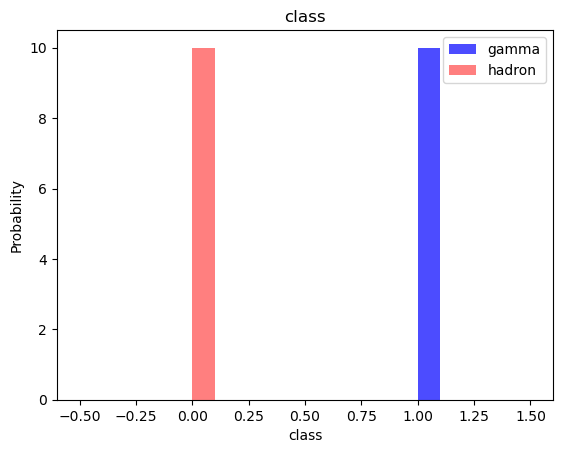

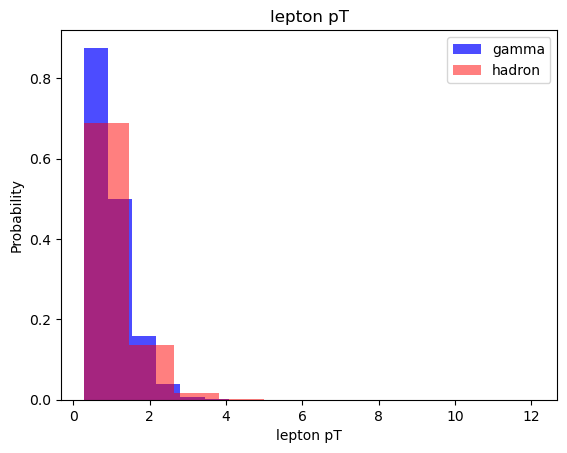

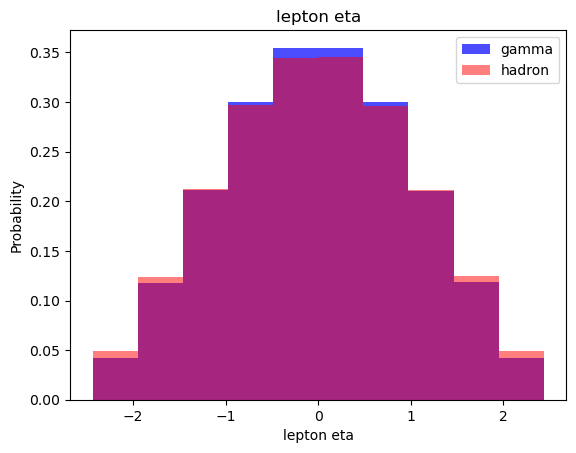

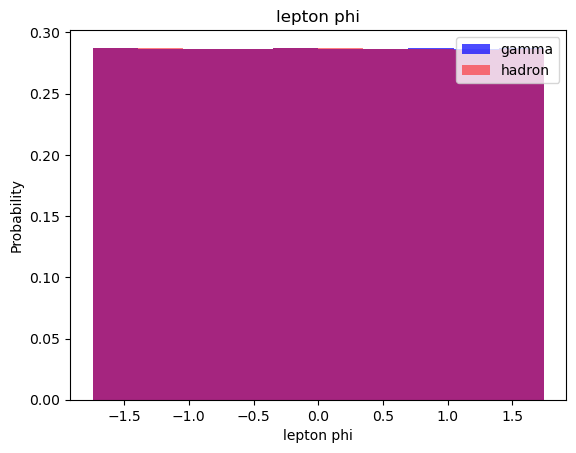

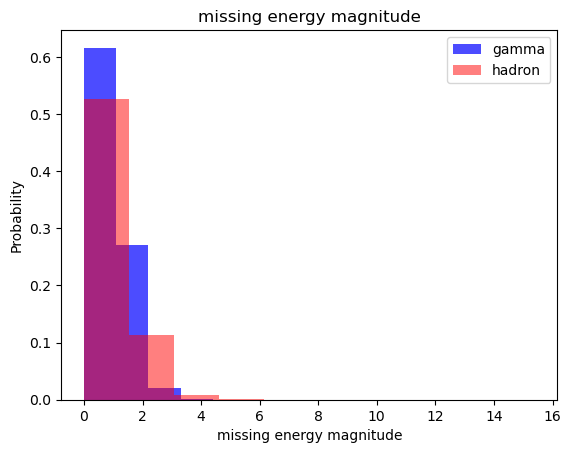

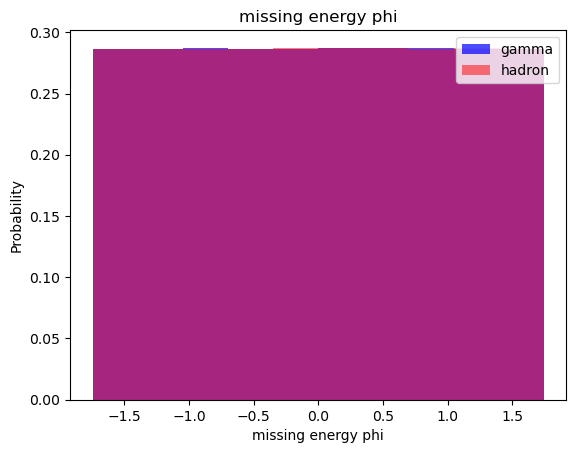

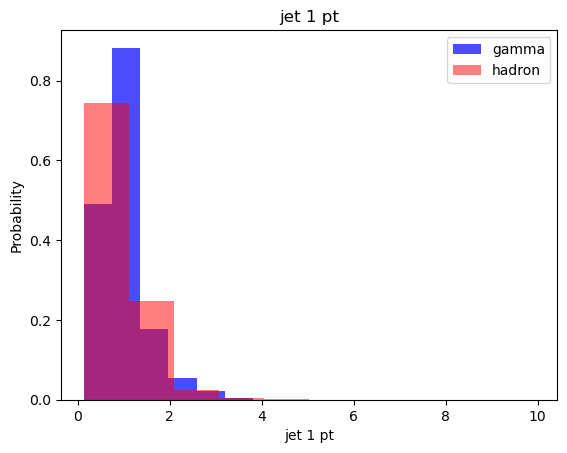

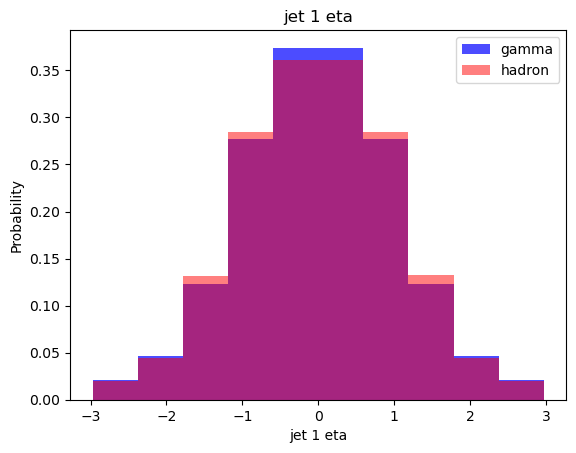

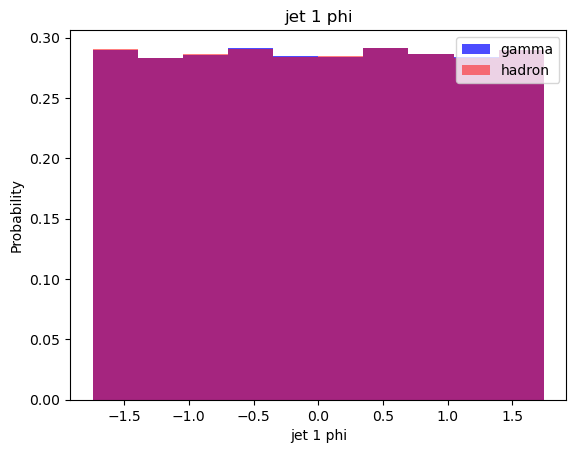

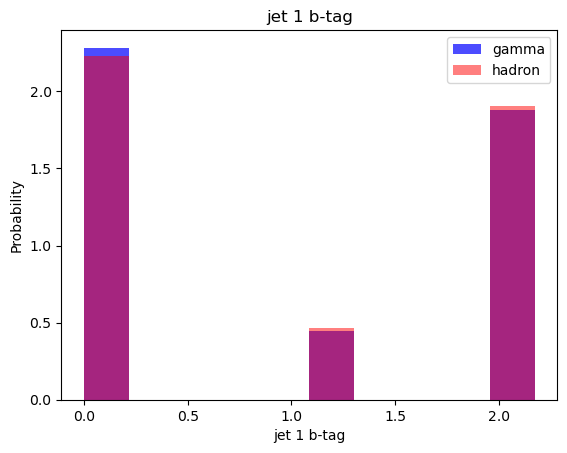

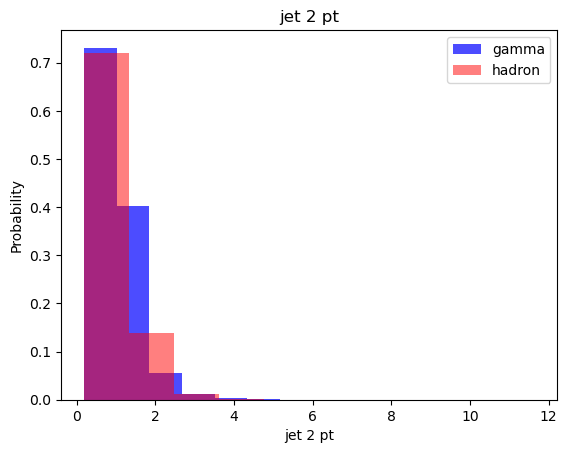

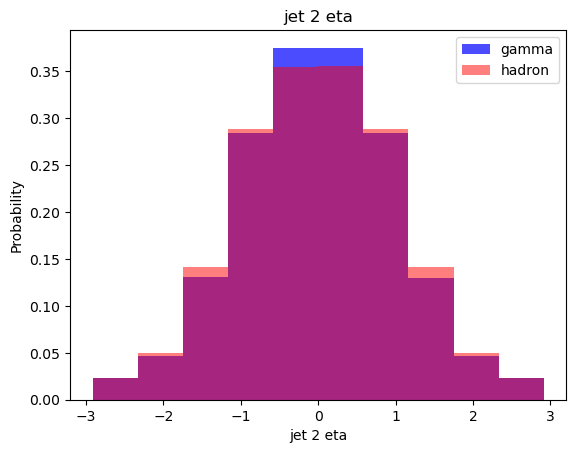

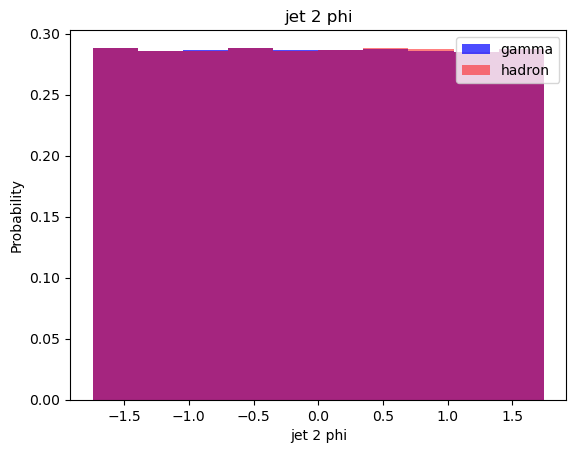

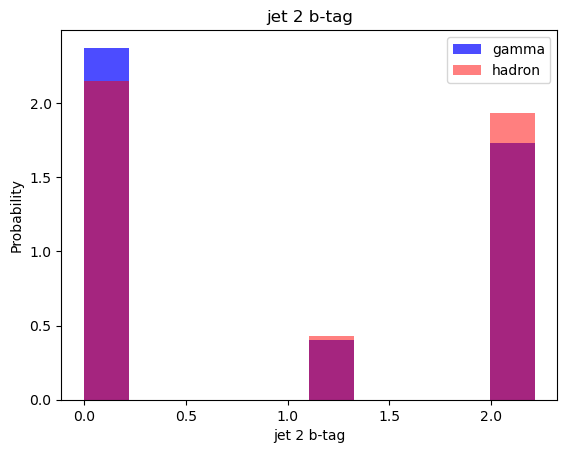

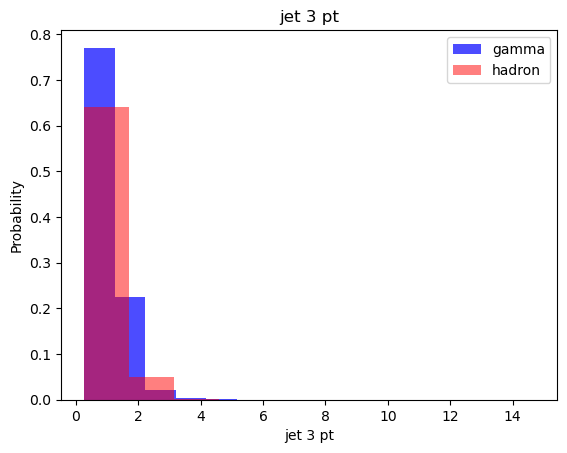

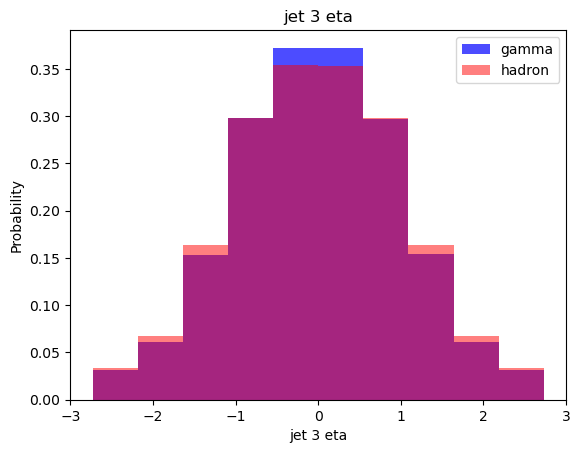

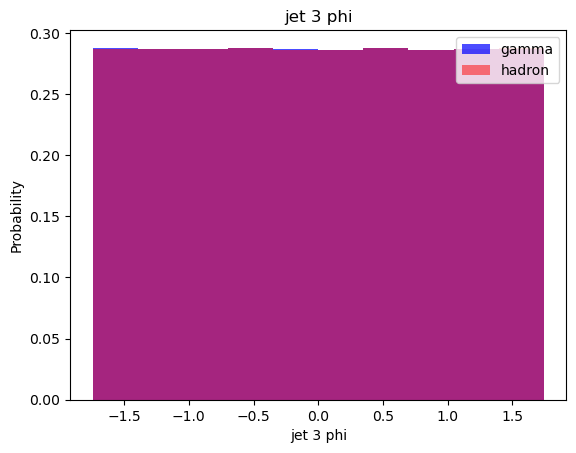

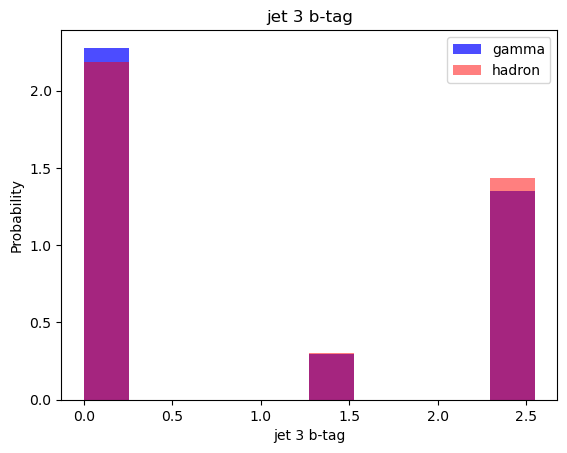

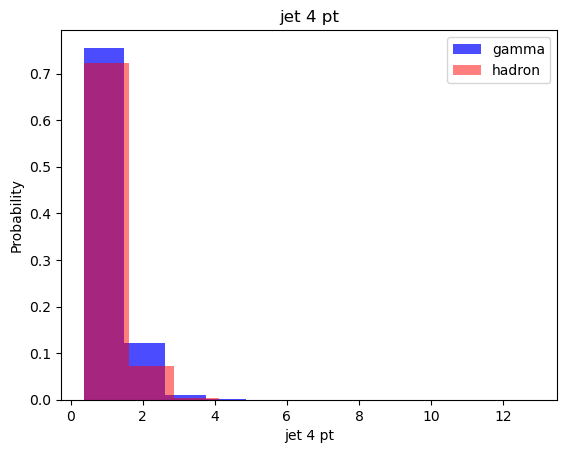

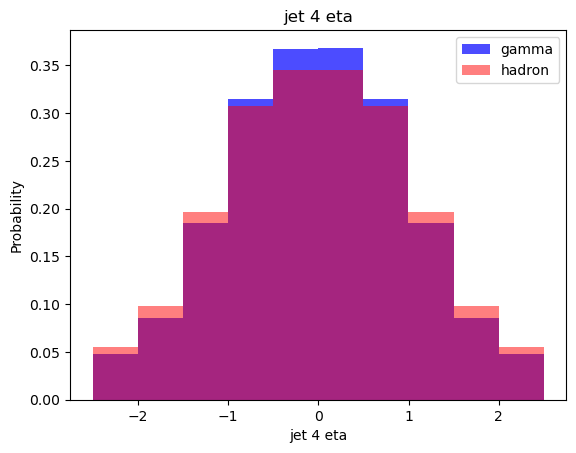

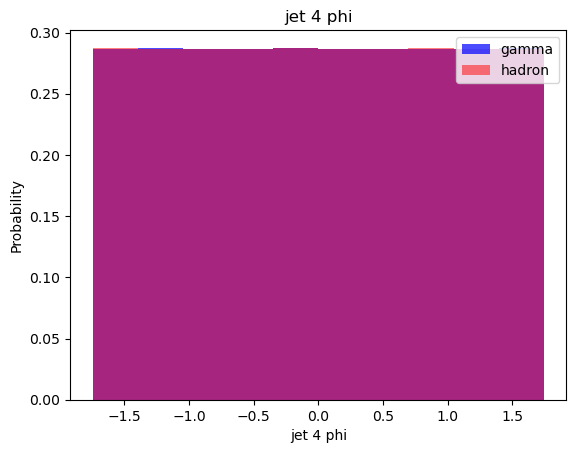

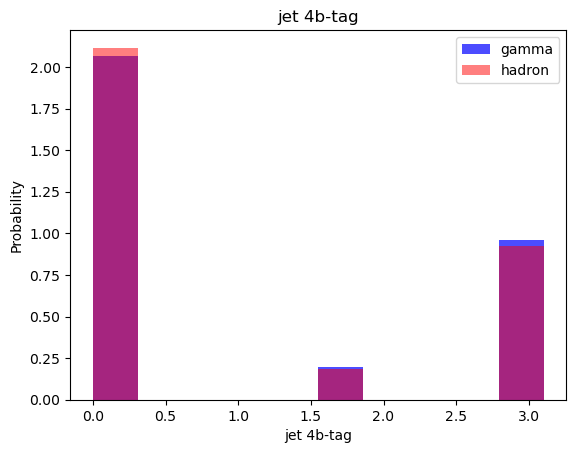

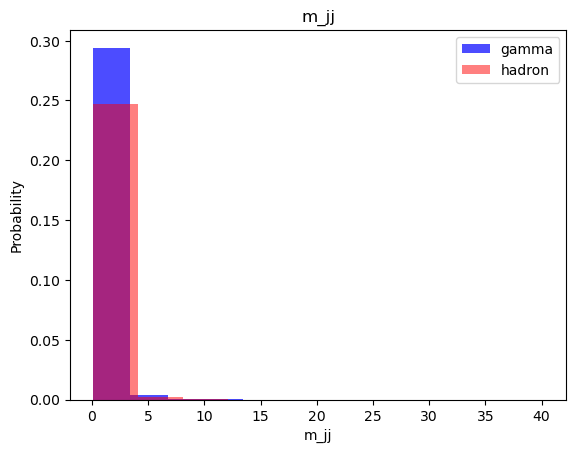

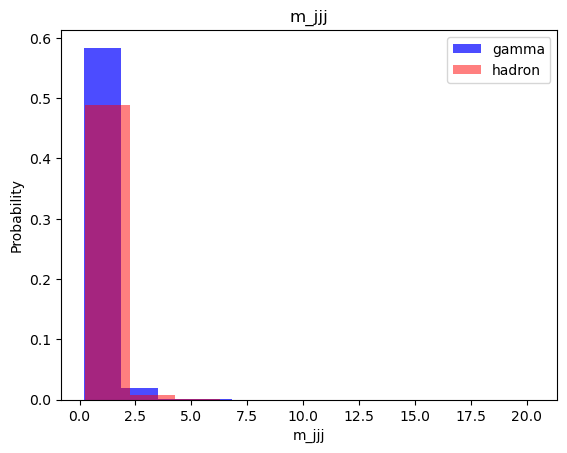

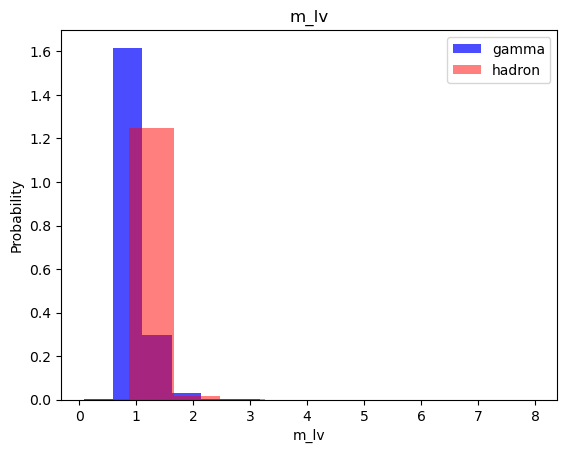

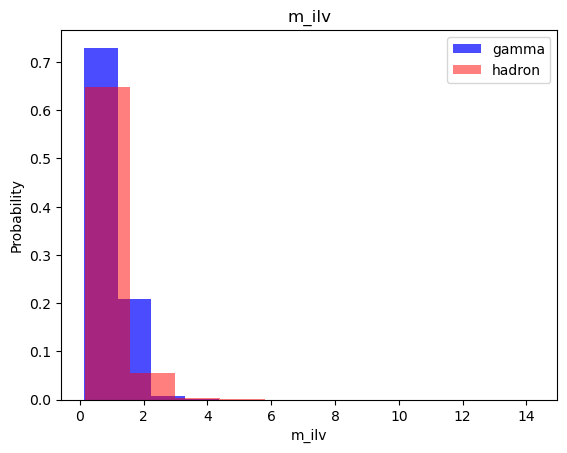

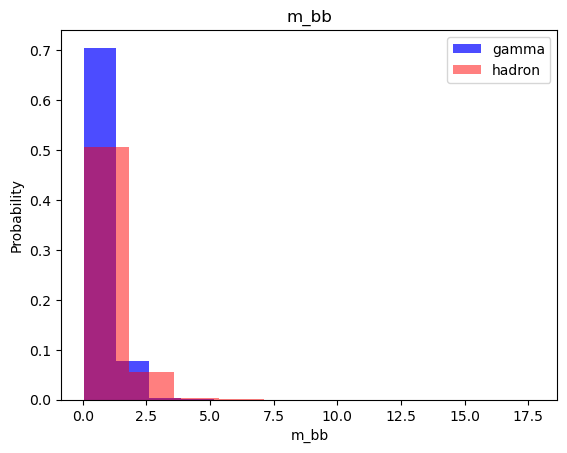

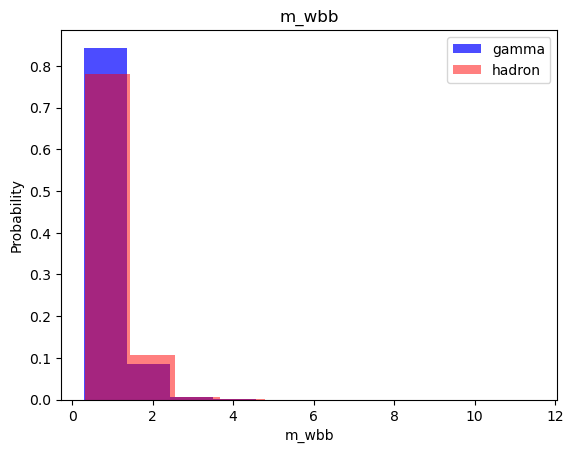

In [15]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label],color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label],color = 'red', label = 'hadron', alpha = 0.5, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [18]:
#Training Data set

In [10]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)),int(0.8*len(df))])

In [11]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[0]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
        
    data = np.hstack((x, np.reshape(y, (-1.1))))
    return data, x, y


In [12]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

3498143
3101857


In [14]:
train, x_train, y_train = scale_dataset(train,oversample = True)
valid, x_valid, y_valid = scale_dataset(valid,oversample = False)
test, x_test, y_test = scale_dataset(test,oversample = False)

AttributeError: 'DataFrame' object has no attribute 'cols'

#### KNN model

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train,y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)


In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

### TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation ='relu', input_shape = (10,))
        tf.keras.layers.Dropout(dropout_prob)
        tf.keras.layers.Dense(32, activation ='relu')
        tf.keras.layers.Dropout(dropout_prob)
        tf.keras.layers.Dense(1, activation ='sigmoid')
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
    history = nn.model.fit(
        x_train,y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )
    return nn_model


In [ ]:
least_val_loss = float('inf')
least_loss_model = Nonespoches = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, droupout {dropout_prob}, lr{lr, batch_size {batch_size}}")
                model , history = train_model(x_train, y_train, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model